# Example 4 - Inclined Layers cut by Fault

This example will show how to convert the geological map below to a `GemPy` model. This example is based on digitized data. The area is 763 m wide (W-E extent) and 989 m high (N-S extent). 
<img src="../../../gemgis/data/examples/example4/task4.png" width="300">

# Importing Libraries

In [1]:
import sys
sys.path.append('../../../gemgis')
import gemgis as gg
import geopandas as gpd
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load Data

The data is loaded as for the previous example. However, orientations are not loaded as these will be calculated by available strike lines as shown in the tutorials. 

In [2]:
base_map = rasterio.open('../../../gemgis/data/examples/example4/task4.png')
interfaces = gpd.read_file('../../../gemgis/data/examples/example4/interfaces4_lines.shp')
# orientations = gpd.read_file('../../../gemgis/data/examples/example4/orientations4.shp')
extent = gpd.read_file('../../../gemgis/data/examples/example4/extent4.shp')
geological_map = gpd.read_file('../../../gemgis/data/examples/example4/geolmap4.shp')
topo = gpd.read_file('../../../gemgis/data/examples/example4/topo4.shp')
custom_section = gpd.read_file('../../../gemgis/data/examples/example4/customsections4.shp')

C:\Users\user_abuser\Anaconda3\lib\site-packages\rasterio\__init__.py:216: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, **kwargs)


# Inspect Data

In [3]:
interfaces.head()

id formation                                           geometry
0  None    Fault1  LINESTRING (1.313 584.319, 27.510 577.887, 51....
1  None    Layer2  LINESTRING (1.470 694.127, 20.294 683.147, 38....
2  None    Layer1  LINESTRING (2.098 852.251, 27.824 837.506, 49....
3  None    Layer1  LINESTRING (503.765 456.000, 510.353 477.962, ...
4  None    Layer1  LINESTRING (145.162 538.513, 160.535 498.355, ...

In [4]:
extent.head()

id                                           geometry
0  None  POLYGON ((0.000 989.000, 763.000 989.000, 763....

In [5]:
geological_map.head()

id formation                                           geometry
0  None  basement  POLYGON ((0.000 0.000, 1.156 430.274, 18.569 4...
1  None    Layer1  POLYGON ((0.000 989.000, 763.000 989.000, 762....
2  None    Layer2  POLYGON ((502.784 451.137, 503.765 456.000, 51...
3  None  basement  POLYGON ((1.470 694.127, 20.294 683.147, 38.80...
4  None    Layer2  POLYGON ((-0.255 854.840, 2.098 852.251, 27.82...

In [6]:
topo.head()

id    Z                                           geometry
0  None  200  LINESTRING (221.244 -2.685, 230.656 6.727, 243...
1  None  300  LINESTRING (43.668 -2.057, 56.845 8.296, 74.41...
2  None  400  LINESTRING (0.843 170.812, 17.314 180.224, 33....
3  None  500  LINESTRING (0.843 296.621, 23.118 311.681, 40....
4  None  600  LINESTRING (1.941 429.332, 40.217 455.059, 70....

# Create GemPy Data Class

In [7]:
geo_data = gg.GemPyData(model_name='Model4', 
                        crs='EPSG:4326')

In [8]:
vars(geo_data)

{'model_name': 'Model4',
 'crs': 'EPSG:4326',
 'extent': None,
 'resolution': None,
 'interfaces': None,
 'orientations': None,
 'section_dict': None,
 'stack': None,
 'dem': None,
 'surface_colors': None,
 'geolmap': None,
 'faults': None,
 'is_fault': None}

# Set Extent

In [9]:
geo_data.set_extent(gdf=extent, minz=100, maxz=900)
geo_data.extent

[0.0, 763.0, 0.0, 989.0, 100, 900]

# Set Resolution

In [10]:
geo_data.set_resolution(50,50,50)
geo_data.resolution

[50, 50, 50]

# Loading Layer Style

In [11]:
cols = gg.utils.load_surface_colors('../../../gemgis/data/examples/example4/style4.qml', geological_map)
cols

['#b35a2a', '#069a2b', '#525252']

# Plot Data

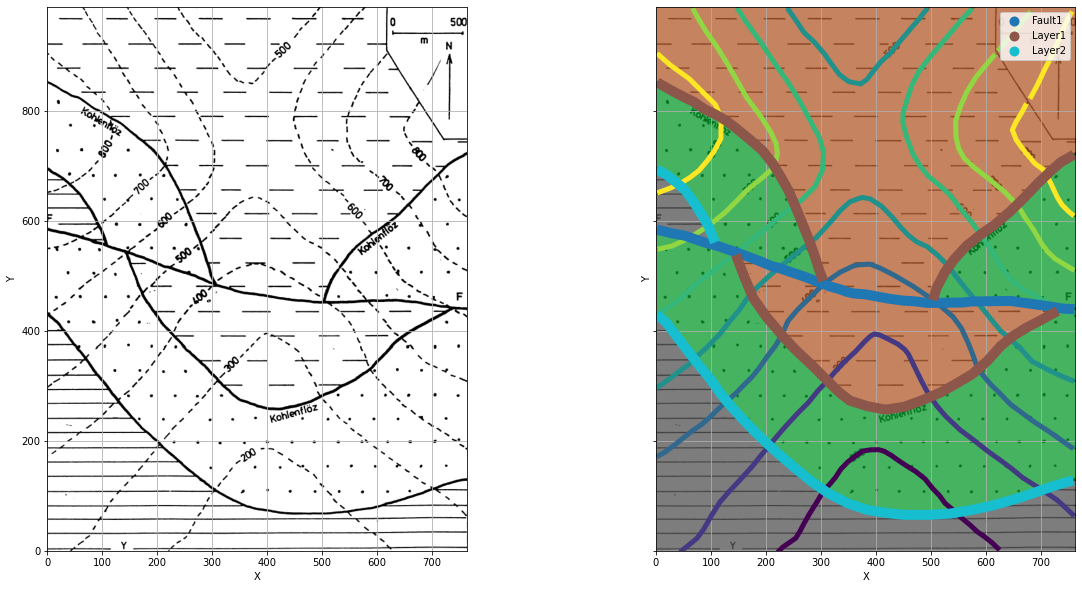

In [12]:
# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
# Plotting the geological map
ax1.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.grid()
ax1.set_ylim(geo_data.extent[2],geo_data.extent[3])
ax1.set_xlim(geo_data.extent[0],geo_data.extent[1])

# Plotting the geological map
ax2.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray')
# Plotting the different elements on the geological map
geological_map.plot(ax=ax2, column = 'formation', alpha=0.75, legend=True, cmap=ListedColormap(cols))
topo.plot(ax=ax2, column = 'Z', legend = False, linewidth = 5)
interfaces.plot(ax=ax2, column = 'formation', legend = True, linewidth = 10)
# orientations.plot(ax=ax2, column = 'formation', legend = False, s = 300)

ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.grid()
ax1.set_ylim(geo_data.extent[2],geo_data.extent[3])
ax1.set_xlim(geo_data.extent[0],geo_data.extent[1]);

# Interpolate Topography

In [13]:
dem = gg.vector.interpolate_raster(topo, method='rbf')
dem

array([[335.94385892, 335.10203526, 334.25984406, ..., 292.96922394,
        293.76010102, 294.55395647],
       [336.09252324, 335.25157714, 334.41028464, ..., 292.94574563,
        293.73674151, 294.53077309],
       [336.24837125, 335.40847115, 334.5682545 , ..., 292.92538677,
        293.71648035, 294.51066913],
       ...,
       [762.96146177, 762.15810352, 761.35079808, ..., 799.86714078,
        800.73958708, 801.59583551],
       [762.62983672, 761.82442125, 761.0150659 , ..., 799.39857372,
        800.27936718, 801.1443121 ],
       [762.30262041, 761.49519723, 760.68384212, ..., 798.93369054,
        799.82184818, 800.69465557]])

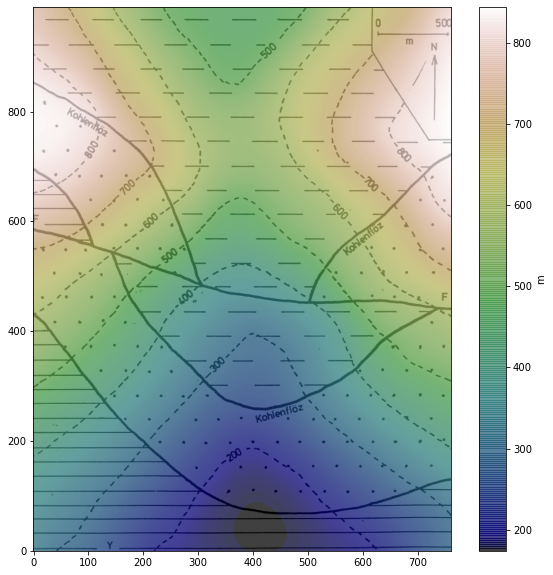

In [14]:
plt.figure(figsize=(10,10))
plt.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray')
im = plt.imshow(dem,origin = 'lower', alpha=0.75, cmap='gist_earth')
cbar = plt.colorbar(im)
cbar.set_label('m')

# Save Topography as Raster

In [15]:
gg.raster.save_as_tiff('../../../gemgis/data/examples/example4/topo.tif',dem, crs='EPSG:4326', extent=[0,765,0,1000])

In [16]:
topography = rasterio.open('../../../gemgis/data/examples/example4/topo.tif')
topography

<open DatasetReader name='../../../gemgis/data/examples/example4/topo.tif' mode='r'>

# Set Interfaces

In [17]:
interfaces_coords = gg.vector.extract_coordinates(interfaces,np.flipud(dem), extent=geo_data.extent)
interfaces_coords.head()

id formation                                           geometry  \
0  None    Fault1  LINESTRING (1.313 584.319, 27.510 577.887, 51....   
0  None    Fault1  LINESTRING (1.313 584.319, 27.510 577.887, 51....   
0  None    Fault1  LINESTRING (1.313 584.319, 27.510 577.887, 51....   
0  None    Fault1  LINESTRING (1.313 584.319, 27.510 577.887, 51....   
0  None    Fault1  LINESTRING (1.313 584.319, 27.510 577.887, 51....   

                                    points           X           Y           Z  
0   (1.313299610144611, 584.3190758000997)    1.313300  584.319076  737.071161  
0   (27.510424697146597, 577.887446287722)   27.510425  577.887446  722.145450  
0  (51.511383609190325, 573.4951139378055)   51.511384  573.495114  707.946652  
0    (90.10116068345673, 560.318116888056)   90.101161  560.318117  665.860999  
0  (111.43534638305117, 554.8277014506605)  111.435346  554.827701  642.632977

In [18]:
geo_data.to_gempy_df(interfaces_coords.sample(n=85), 'interfaces')
geo_data.interfaces

index           X           Y           Z formation
0       2   27.824163  837.505662  823.422306    Layer1
1       5  200.850684  196.225139  304.983349    Layer2
2       0  222.969214  514.826103  498.724212    Fault1
3       5  534.667942   67.592549  195.208258    Layer2
4       4  673.183280  405.488402  535.541205    Layer1
..    ...         ...         ...         ...       ...
80      5   78.179116  337.407250  483.180744    Layer2
81      0  663.614270  451.921629  571.875037    Fault1
82      0  741.107563  440.470191  599.441910    Fault1
83      3  669.418424  642.046872  724.913543    Layer1
84      3  510.353245  477.961885  430.814350    Layer1

[85 rows x 5 columns]

# Set Orientations

As orientations were not loaded, they have to be calculated based on strike lines provided for the lithological layers and the fault. 

## Load Fault Data and Calculate Orientations

In [19]:
strike_fault = gpd.read_file('../../../gemgis/data/examples/example4/lines_strike_fault.shp')
strike_fault

id    Z formation                                       geometry
0   1  400    Fault1  LINESTRING (306.110 484.786, 511.198 451.597)
1   2  500    Fault1  LINESTRING (223.696 514.599, 583.462 453.789)
2   3  600    Fault1  LINESTRING (146.764 542.741, 740.718 440.638)

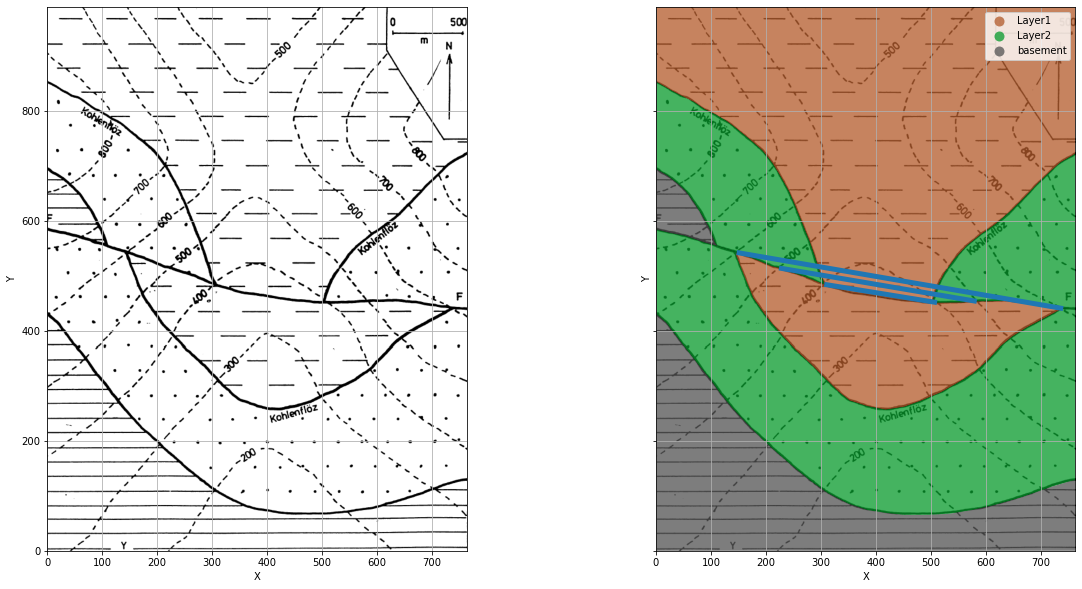

In [20]:
# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
# Plotting the geological map
ax1.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.grid()
ax1.set_ylim(geo_data.extent[2],geo_data.extent[3])
ax1.set_xlim(geo_data.extent[0],geo_data.extent[1])

# Plotting the geological map
ax2.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray')
# Plotting the different elements on the geological map
geological_map.plot(ax=ax2, column = 'formation', alpha=0.75, legend=True, cmap=ListedColormap(cols))
# topo.plot(ax=ax2, column = 'Z', legend = False, linewidth = 5)
# interfaces.plot(ax=ax2, column = 'formation', legend = True, linewidth = 10)
# orientations.plot(ax=ax2, column = 'formation', legend = False, s = 300)
strike_fault.plot(ax=ax2, column = 'formation', legend = False, linewidth = 5)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.grid()
ax1.set_ylim(geo_data.extent[2],geo_data.extent[3])
ax1.set_xlim(geo_data.extent[0],geo_data.extent[1]);

Based on the strike lines and the calculated angles, we can conclude that the fault is dipping towards the south. Please take into account that the map was not digitized to scale. So angles are usually higher than expected for certain types of faults!

In [21]:
orientations_fault = gg.utils.calculate_orientations(strike_fault)
orientations_fault 

X           Y      Z        dip     azimuth  polarity formation
0  406.116264  476.192891  450.0  81.498734  189.495426         1    Fault1
1  423.660122  487.941779  550.0  81.938874  189.711081         1    Fault1

## Load Layer Data 
For the strike of the different layers we have to distinguish between layer 1 and layer 2 and between the two fault blocks. 

In [22]:
strike_layers = gpd.read_file('../../../gemgis/data/examples/example4/lines_strike_layers.shp')
strike_layers

id    Z formation                                           geometry
0    1  300    Layer1      LINESTRING (311.657 309.826, 497.763 279.280)
1    2  400    Layer1      LINESTRING (228.787 392.414, 586.856 331.605)
2    3  500    Layer1      LINESTRING (173.917 467.931, 644.272 386.192)
3    4  600    Layer1      LINESTRING (147.613 542.600, 740.436 440.496)
4    1  200    Layer2       LINESTRING (306.708 109.579, 546.835 69.416)
5    2  300    Layer2  LINESTRING (205.736 192.450, 205.736 192.450, ...
6    3  400    Layer2      LINESTRING (128.522 273.623, 763.204 175.762)
7    4  500    Layer2  LINESTRING (69.126 348.292, 760.941 241.946, 7...
8    5  600    Layer2  LINESTRING (2.943 428.617, 2.943 428.617, 2.94...
9    5  500    Layer1      LINESTRING (280.687 560.701, 532.976 517.710)
10   6  600    Layer1      LINESTRING (252.969 628.016, 591.240 575.974)
11   7  700    Layer1      LINESTRING (214.503 700.987, 657.423 630.279)
12   8  800    Layer1      LINESTRING (116.642 788.666, 712.293 684.583)
13   6  800    Layer2       LINESTRING (40.277 666.482, 761.507 555.044)
14   7  700    Layer2       LINESTRING (95.147 591.247, 761.507 478.679)

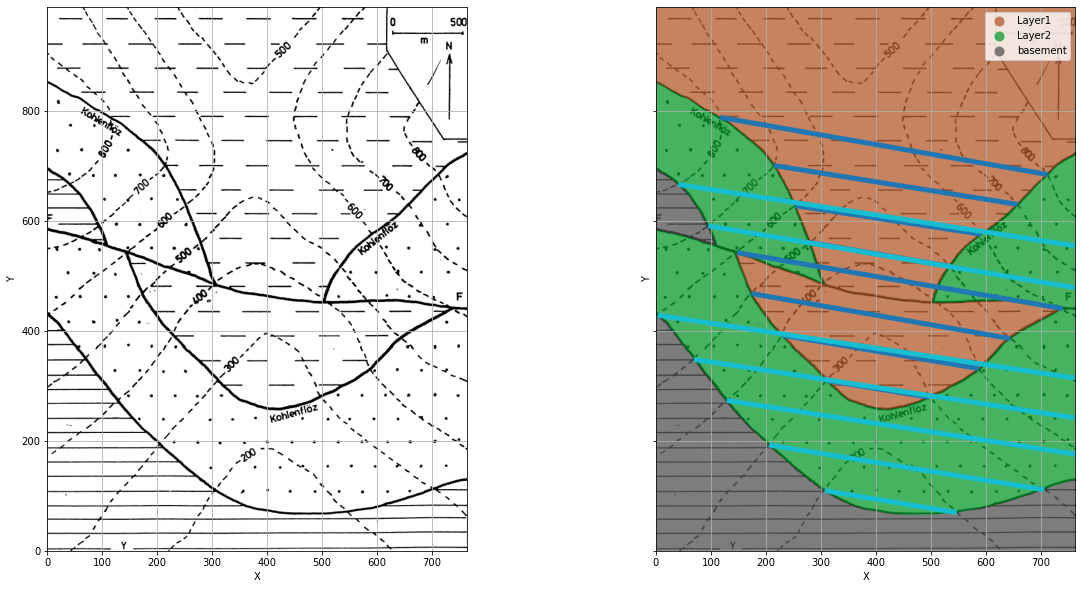

In [23]:
# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
# Plotting the geological map
ax1.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.grid()
ax1.set_ylim(geo_data.extent[2],geo_data.extent[3])
ax1.set_xlim(geo_data.extent[0],geo_data.extent[1])

# Plotting the geological map
ax2.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray')
# Plotting the different elements on the geological map
geological_map.plot(ax=ax2, column = 'formation', alpha=0.75, legend=True, cmap=ListedColormap(cols))
# topo.plot(ax=ax2, column = 'Z', legend = False, linewidth = 5)
# interfaces.plot(ax=ax2, column = 'formation', legend = True, linewidth = 10)
# orientations.plot(ax=ax2, column = 'formation', legend = False, s = 300)
strike_layers.plot(ax=ax2, column = 'formation', legend = False, linewidth = 5)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.grid()
ax1.set_ylim(geo_data.extent[2],geo_data.extent[3])
ax1.set_xlim(geo_data.extent[0],geo_data.extent[1]);

## Separate Layers

In [24]:
gdf1 = strike_layers[strike_layers['formation'] == 'Layer1']
gdf1

id    Z formation                                       geometry
0    1  300    Layer1  LINESTRING (311.657 309.826, 497.763 279.280)
1    2  400    Layer1  LINESTRING (228.787 392.414, 586.856 331.605)
2    3  500    Layer1  LINESTRING (173.917 467.931, 644.272 386.192)
3    4  600    Layer1  LINESTRING (147.613 542.600, 740.436 440.496)
9    5  500    Layer1  LINESTRING (280.687 560.701, 532.976 517.710)
10   6  600    Layer1  LINESTRING (252.969 628.016, 591.240 575.974)
11   7  700    Layer1  LINESTRING (214.503 700.987, 657.423 630.279)
12   8  800    Layer1  LINESTRING (116.642 788.666, 712.293 684.583)

In [25]:
gdf2 = strike_layers[strike_layers['formation'] == 'Layer2']
gdf2

id    Z formation                                           geometry
4    1  200    Layer2       LINESTRING (306.708 109.579, 546.835 69.416)
5    2  300    Layer2  LINESTRING (205.736 192.450, 205.736 192.450, ...
6    3  400    Layer2      LINESTRING (128.522 273.623, 763.204 175.762)
7    4  500    Layer2  LINESTRING (69.126 348.292, 760.941 241.946, 7...
8    5  600    Layer2  LINESTRING (2.943 428.617, 2.943 428.617, 2.94...
13   6  800    Layer2       LINESTRING (40.277 666.482, 761.507 555.044)
14   7  700    Layer2       LINESTRING (95.147 591.247, 761.507 478.679)

In [26]:
gdf1_south = gdf1[gdf1['id']<= 4]
gdf1_south

id    Z formation                                       geometry
0   1  300    Layer1  LINESTRING (311.657 309.826, 497.763 279.280)
1   2  400    Layer1  LINESTRING (228.787 392.414, 586.856 331.605)
2   3  500    Layer1  LINESTRING (173.917 467.931, 644.272 386.192)
3   4  600    Layer1  LINESTRING (147.613 542.600, 740.436 440.496)

In [27]:
gdf1_north = gdf1[gdf1['id']> 4]
gdf1_north

id    Z formation                                       geometry
9    5  500    Layer1  LINESTRING (280.687 560.701, 532.976 517.710)
10   6  600    Layer1  LINESTRING (252.969 628.016, 591.240 575.974)
11   7  700    Layer1  LINESTRING (214.503 700.987, 657.423 630.279)
12   8  800    Layer1  LINESTRING (116.642 788.666, 712.293 684.583)

In [28]:
gdf2_south = gdf2[gdf2['id']<= 5]
gdf2_south

id    Z formation                                           geometry
4   1  200    Layer2       LINESTRING (306.708 109.579, 546.835 69.416)
5   2  300    Layer2  LINESTRING (205.736 192.450, 205.736 192.450, ...
6   3  400    Layer2      LINESTRING (128.522 273.623, 763.204 175.762)
7   4  500    Layer2  LINESTRING (69.126 348.292, 760.941 241.946, 7...
8   5  600    Layer2  LINESTRING (2.943 428.617, 2.943 428.617, 2.94...

In [29]:
gdf2_north = gdf2[gdf2['id']> 5]
gdf2_north

id    Z formation                                      geometry
13   6  800    Layer2  LINESTRING (40.277 666.482, 761.507 555.044)
14   7  700    Layer2  LINESTRING (95.147 591.247, 761.507 478.679)

## Calculate Orientations

In [30]:
orientations1_south = gg.utils.calculate_orientations(gdf1_south)
orientations1_south

X           Y      Z        dip     azimuth  polarity formation
0  406.265757  328.281300  350.0  56.163477  189.570970         1    Layer1
1  408.457730  394.535449  450.0  57.248407  189.777815         1    Layer1
2  426.559183  459.304713  550.0  55.203043  189.805652         1    Layer1

In [31]:
orientations1_north = gg.utils.calculate_orientations(gdf1_north)
orientations1_north

X           Y      Z        dip     azimuth  polarity formation
0  414.467978  570.600370  550.0  57.203244  189.077735         1    Layer1
1  429.033991  633.814040  650.0  56.966206  188.951028         1    Layer1
2  425.215716  701.128821  750.0  56.388040  189.612656         1    Layer1

In [32]:
orientations2_south = gg.utils.calculate_orientations(gdf2_south)
orientations2_south

X           Y           Z        dip     azimuth  polarity  \
0  483.439365  128.124880  271.428571  56.516928  189.263941         1   
1  488.894044  166.752090  328.571429  54.755503  189.050624         1   
2  496.546757  256.313880  460.000000  57.001197  188.749272         1   
3  337.253964  347.483791  557.142857  54.820677  188.643271         1   

  formation  
0    Layer2  
1    Layer2  
2    Layer2  
3    Layer2

In [33]:
orientations2_north = gg.utils.calculate_orientations(gdf2_north)
orientations2_north

X           Y      Z        dip     azimuth  polarity formation
0  414.609395  572.863052  750.0  54.784035  189.154487         1    Layer2

## Merge DataFrames

In [34]:
orientations_coords = pd.concat([orientations_fault, orientations1_south, orientations1_north, orientations2_south, orientations2_north]).reset_index()
orientations_coords

index           X           Y           Z        dip     azimuth  \
0       0  406.116264  476.192891  450.000000  81.498734  189.495426   
1       1  423.660122  487.941779  550.000000  81.938874  189.711081   
2       0  406.265757  328.281300  350.000000  56.163477  189.570970   
3       1  408.457730  394.535449  450.000000  57.248407  189.777815   
4       2  426.559183  459.304713  550.000000  55.203043  189.805652   
5       0  414.467978  570.600370  550.000000  57.203244  189.077735   
6       1  429.033991  633.814040  650.000000  56.966206  188.951028   
7       2  425.215716  701.128821  750.000000  56.388040  189.612656   
8       0  483.439365  128.124880  271.428571  56.516928  189.263941   
9       1  488.894044  166.752090  328.571429  54.755503  189.050624   
10      2  496.546757  256.313880  460.000000  57.001197  188.749272   
11      3  337.253964  347.483791  557.142857  54.820677  188.643271   
12      0  414.609395  572.863052  750.000000  54.784035  189.154487   

    polarity formation  
0          1    Fault1  
1          1    Fault1  
2          1    Layer1  
3          1    Layer1  
4          1    Layer1  
5          1    Layer1  
6          1    Layer1  
7          1    Layer1  
8          1    Layer2  
9          1    Layer2  
10         1    Layer2  
11         1    Layer2  
12         1    Layer2

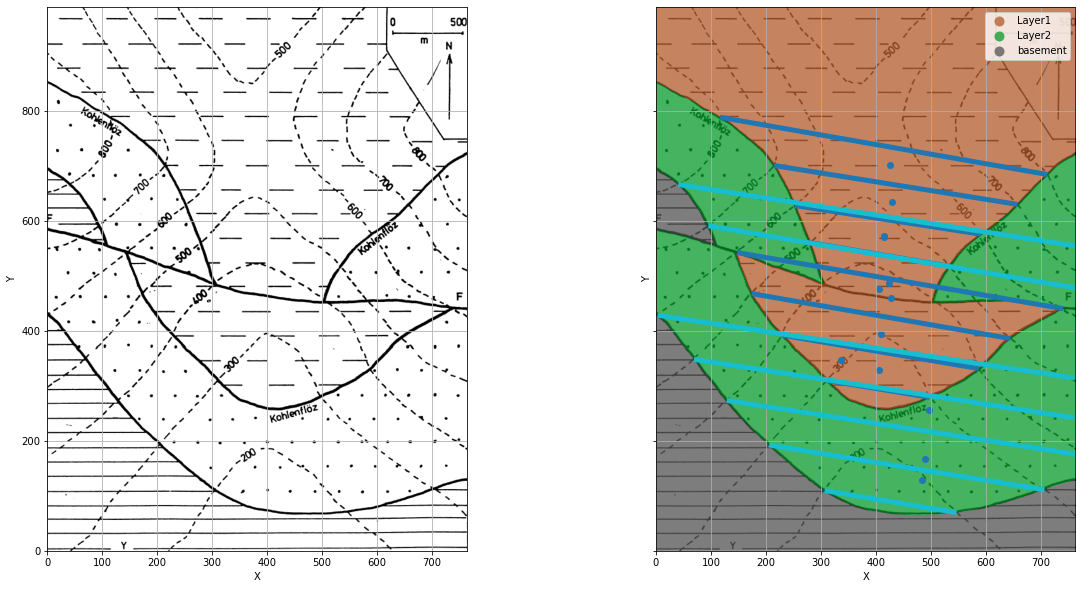

In [35]:
# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
# Plotting the geological map
ax1.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.grid()
ax1.set_ylim(geo_data.extent[2],geo_data.extent[3])
ax1.set_xlim(geo_data.extent[0],geo_data.extent[1])

# Plotting the geological map
ax2.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray')
# Plotting the different elements on the geological map
geological_map.plot(ax=ax2, column = 'formation', alpha=0.75, legend=True, cmap=ListedColormap(cols))
# topo.plot(ax=ax2, column = 'Z', legend = False, linewidth = 5)
# interfaces.plot(ax=ax2, column = 'formation', legend = True, linewidth = 10)
ax2.scatter(orientations_coords['X'], orientations_coords['Y'])
strike_layers.plot(ax=ax2, column = 'formation', legend = False, linewidth = 5)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.grid()
ax1.set_ylim(geo_data.extent[2],geo_data.extent[3])
ax1.set_xlim(geo_data.extent[0],geo_data.extent[1]);

In [36]:
geo_data.orientations = orientations_coords
geo_data.orientations

index           X           Y           Z        dip     azimuth  \
0       0  406.116264  476.192891  450.000000  81.498734  189.495426   
1       1  423.660122  487.941779  550.000000  81.938874  189.711081   
2       0  406.265757  328.281300  350.000000  56.163477  189.570970   
3       1  408.457730  394.535449  450.000000  57.248407  189.777815   
4       2  426.559183  459.304713  550.000000  55.203043  189.805652   
5       0  414.467978  570.600370  550.000000  57.203244  189.077735   
6       1  429.033991  633.814040  650.000000  56.966206  188.951028   
7       2  425.215716  701.128821  750.000000  56.388040  189.612656   
8       0  483.439365  128.124880  271.428571  56.516928  189.263941   
9       1  488.894044  166.752090  328.571429  54.755503  189.050624   
10      2  496.546757  256.313880  460.000000  57.001197  188.749272   
11      3  337.253964  347.483791  557.142857  54.820677  188.643271   
12      0  414.609395  572.863052  750.000000  54.784035  189.154487   

    polarity formation  
0          1    Fault1  
1          1    Fault1  
2          1    Layer1  
3          1    Layer1  
4          1    Layer1  
5          1    Layer1  
6          1    Layer1  
7          1    Layer1  
8          1    Layer2  
9          1    Layer2  
10         1    Layer2  
11         1    Layer2  
12         1    Layer2

# Check Data Class

In [37]:
vars(geo_data)

{'model_name': 'Model4',
 'crs': 'EPSG:4326',
 'extent': [0.0, 763.0, 0.0, 989.0, 100, 900],
 'resolution': [50, 50, 50],
 'interfaces':     index           X           Y           Z formation
 0       2   27.824163  837.505662  823.422306    Layer1
 1       5  200.850684  196.225139  304.983349    Layer2
 2       0  222.969214  514.826103  498.724212    Fault1
 3       5  534.667942   67.592549  195.208258    Layer2
 4       4  673.183280  405.488402  535.541205    Layer1
 ..    ...         ...         ...         ...       ...
 80      5   78.179116  337.407250  483.180744    Layer2
 81      0  663.614270  451.921629  571.875037    Fault1
 82      0  741.107563  440.470191  599.441910    Fault1
 83      3  669.418424  642.046872  724.913543    Layer1
 84      3  510.353245  477.961885  430.814350    Layer1
 
 [85 rows x 5 columns],
 'orientations':     index           X           Y           Z        dip     azimuth  \
 0       0  406.116264  476.192891  450.000000  81.498734  189.49

# Add Section Dict

In [38]:
geo_data.to_section_dict(custom_section, 'section')
geo_data.section_dict

{'Section1': ([139.83498503826536, 0.0],
  [138.42080896823512, 989.0],
  [100, 80])}

# Add Surface Colors

In [39]:
geo_data.to_surface_color_dict('../../../gemgis/data/examples/example4/style4.qml')
geo_data.surface_colors

{'basement': '#525252', 'Layer1': '#b35a2a', 'Layer2': '#069a2b'}

# Add Stack

In [40]:
geo_data.stack = {  "Fault1": ('Fault1'),
                    "Strat_Series": ('Layer2', 'Layer1'),
                    "basement": ('basement')}
geo_data.stack

{'Fault1': 'Fault1',
 'Strat_Series': ('Layer2', 'Layer1'),
 'basement': 'basement'}

# Add DEM

In [41]:
geo_data.dem = '../../../gemgis/data/examples/example4/raster4.tif'
geo_data.dem

'../../../gemgis/data/examples/example4/raster4.tif'

# Visualize Data Set

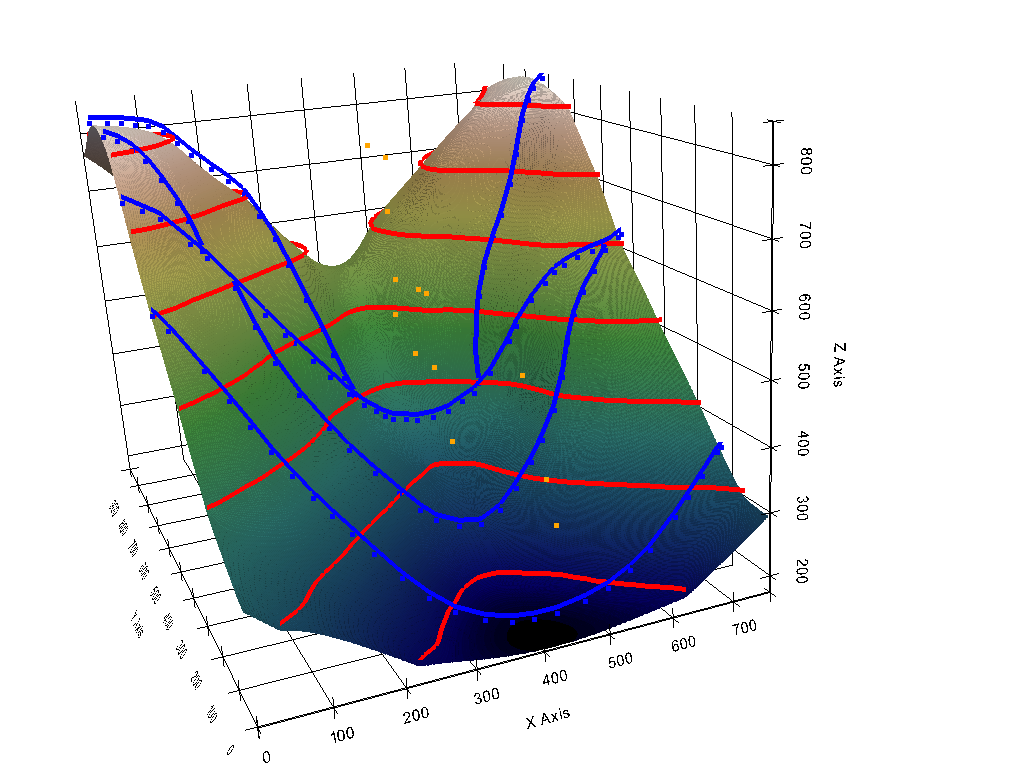

In [42]:
import pyvista as pv
p = pv.Plotter(notebook =True)
gg.visualization.plot_dem_3d(dem, p, cmap = 'gist_earth')
gg.visualization.plot_contours_3d(topo, p, color = 'red', add_to_z = 10)
gg.visualization.plot_points_3d(interfaces_coords, p, color = 'blue', add_to_z = 10)
gg.visualization.plot_points_3d(orientations_coords, p, color = 'orange', add_to_z = 20)
gg.visualization.plot_contours_3d(interfaces_coords, p, color = 'blue', add_to_z = 10)

p.camera_position =[(-283.285811675846, -1597.1397046051004, 1155.542325449192), 
                    (577.9371599370799, 495.3480261506809, 381.7124055285182), 
                    (0.17313457304419916, 0.27814381639313923, 0.9448070898437746)]
p.set_background('white')
p.show_grid(color='black')
p.show()

# Create GemPy Model

## Importing GemPy

Please see https://docs.gempy.org/installation.html for more information on how to install GemPy.

In [43]:
import sys  
sys.path.append('../../../gempy-master')
import gempy as gp
print(gp)
print(gp.__version__)

<module 'gempy' from '../../../gempy-master\\gempy\\__init__.py'>
2.2.2


## Creating GemPy Model

For more information on how to create a GemPy Model, please see the tutorials at: https://docs.gempy.org/tutorials/index.html. With the attributes of the GemPy Data Class, all necessary variables can be passed to the model.

In [44]:
geo_model = gp.create_model(geo_data.model_name)
geo_model

Model4  2020-07-31 07:40

In [45]:
gp.init_data(geo_model, geo_data.extent, geo_data.resolution,
             surface_points_df = geo_data.interfaces,
             orientations_df = geo_data.orientations,
             default_values=True)

Active grids: ['regular']


Model4  2020-07-31 07:40

In [46]:
geo_model.surfaces

surface          series  order_surfaces    color  id
0  Layer1  Default series               1  #015482   1
1  Layer2  Default series               2  #9f0052   2
2  Fault1  Default series               3  #ffbe00   3

In [47]:
geo_data.stack

{'Fault1': 'Fault1',
 'Strat_Series': ('Layer2', 'Layer1'),
 'basement': 'basement'}

In [48]:
gp.map_stack_to_surfaces(geo_model,
                         geo_data.stack,
                         remove_unused_series=True)
geo_model.add_surfaces('basement')

surface        series  order_surfaces    color  id
2    Fault1        Fault1               1  #015482   1
0    Layer1  Strat_Series               1  #9f0052   2
1    Layer2  Strat_Series               2  #ffbe00   3
3  basement  Strat_Series               3  #728f02   4

In [49]:
geo_model.surfaces.colors.change_colors(geo_data.surface_colors)

surface        series  order_surfaces    color  id
2    Fault1        Fault1               1  #015482   1
0    Layer1  Strat_Series               1  #b35a2a   2
1    Layer2  Strat_Series               2  #069a2b   3
3  basement  Strat_Series               3  #525252   4

../../../gempy-master\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


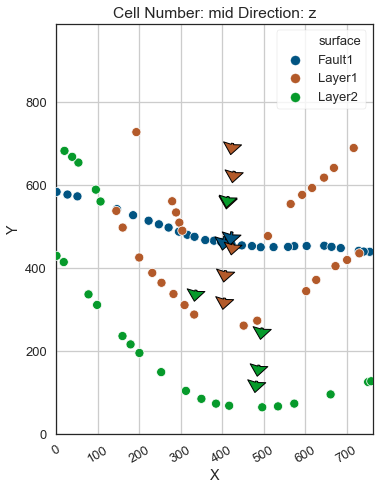

In [50]:
gp.plot_2d(geo_model, direction = 'z')
plt.grid()

A raster created with ArcGIS has to be loaded as the import of the created raster fails. This is due to a bug in `GemPy`described here: https://github.com/cgre-aachen/gempy/issues/492

In [51]:
geo_model.set_topography(
    source='gdal', filepath='../../../gemgis/data/examples/example4/topo.tif')

Cropped raster to geo_model.grid.extent.
depending on the size of the raster, this can take a while...
storing converted file...
Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[  7.63      ,   9.89      , 108.        ],
       [  7.63      ,   9.89      , 124.        ],
       [  7.63      ,   9.89      , 140.        ],
       ...,
       [762.49603699, 986.47961264, 804.68737793],
       [762.49603699, 987.48776758, 804.26873779],
       [762.49603699, 988.49592253, 803.85107422]])

In [52]:
geo_model.set_section_grid(geo_data.section_dict)

Active grids: ['regular' 'topography' 'sections']


start                         stop resolution        dist
Section1  [139.83498503826536, 0.0]  [138.42080896823512, 989.0]  [100, 80]  989.001011

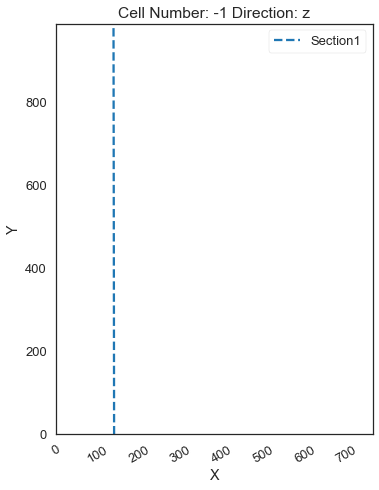

In [53]:
gp.plot.plot_section_traces(geo_model)

In [54]:
geo_model.set_is_fault(['Fault1'])

Fault colors changed. If you do not like this behavior, set change_color to False.


order_series BottomRelation  isActive  isFault  isFinite
Fault1                   1          Fault      True     True     False
Strat_Series             2        Erosion      True    False     False

In [55]:
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    verbose=[],
                    update_kriging = False
                    )

Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  1
Compilation Done!
Kriging values: 
                   values
range            1483.34
$C_o$            52387.9
drift equations   [3, 3]


In [56]:
sol = gp.compute_model(geo_model)

../../../gempy-master\gempy\core\solution.py:315: UserWarning: Surfaces not computed due to: module 'skimage.measure' has no attribute 'marching_cubes'. The surface is: Series: module 'skimage.measure' has no attribute 'marching_cubes'; Surface Number:0
  '; Surface Number:' + str(s_n))
../../../gempy-master\gempy\core\solution.py:315: UserWarning: Surfaces not computed due to: module 'skimage.measure' has no attribute 'marching_cubes'. The surface is: Series: module 'skimage.measure' has no attribute 'marching_cubes'; Surface Number:1
  '; Surface Number:' + str(s_n))
../../../gempy-master\gempy\core\solution.py:315: UserWarning: Surfaces not computed due to: module 'skimage.measure' has no attribute 'marching_cubes'. The surface is: Series: module 'skimage.measure' has no attribute 'marching_cubes'; Surface Number:2
  '; Surface Number:' + str(s_n))


The geological map had to be created manually as there seems to be a bug when creating the geological map with `GemGIS`. This was reported already: https://github.com/cgre-aachen/gempy/issues/446

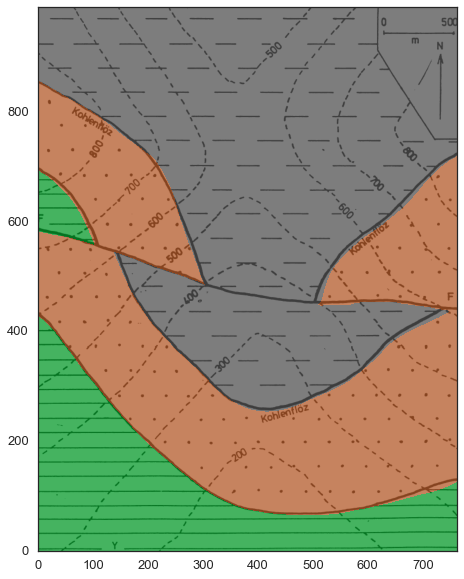

In [57]:
shape = geo_model._grid.topography.values_2d[:, :, 2].shape
geolmap = geo_model.solutions.geological_map[0].reshape(shape)
cols = ['#069a2b', '#b35a2a','#525252', ]
plt.figure(figsize=(10,10))
plt.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray')
gmap = np.rot90(geolmap,1)
plt.imshow(gmap, extent=geo_data.extent[:4], alpha=0.75, cmap=ListedColormap(cols))

../../../gempy-master\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


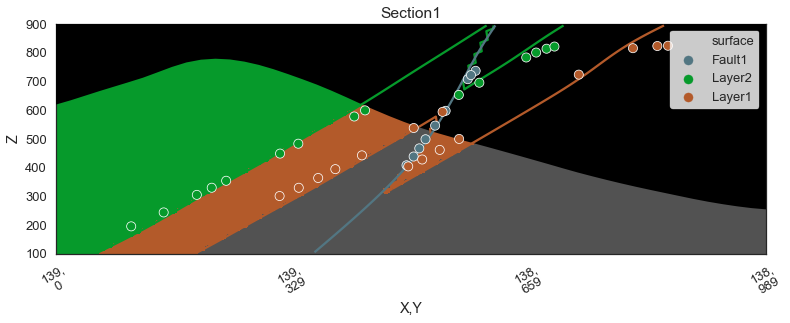

In [58]:
gp.plot_2d(geo_model, section_names=['Section1'], show_topography=True, ve = 0.4)

../../../gempy-master\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


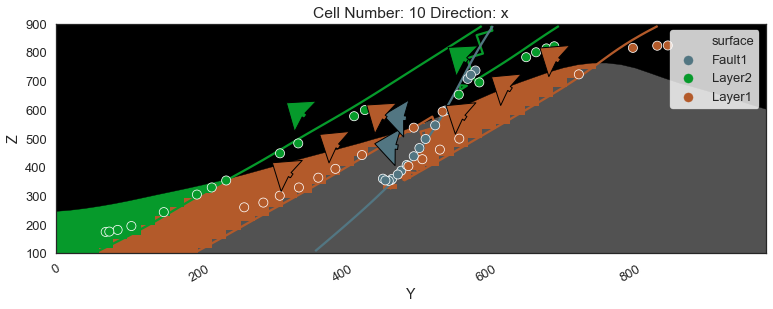

In [59]:
gp.plot_2d(geo_model, direction='x', show_topography=True, cell_number=10, ve=0.4)

../../../gempy-master\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


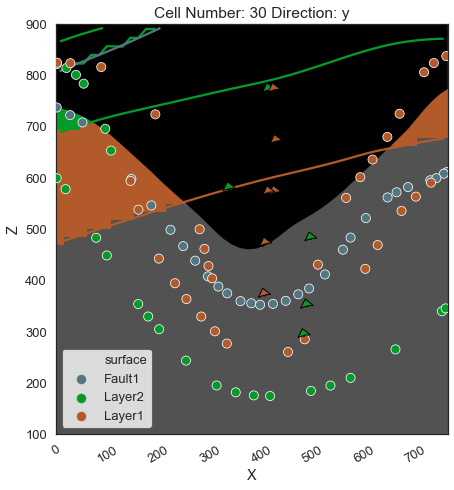

In [60]:
gp.plot_2d(geo_model, direction='y', show_topography=True, cell_number = 30)

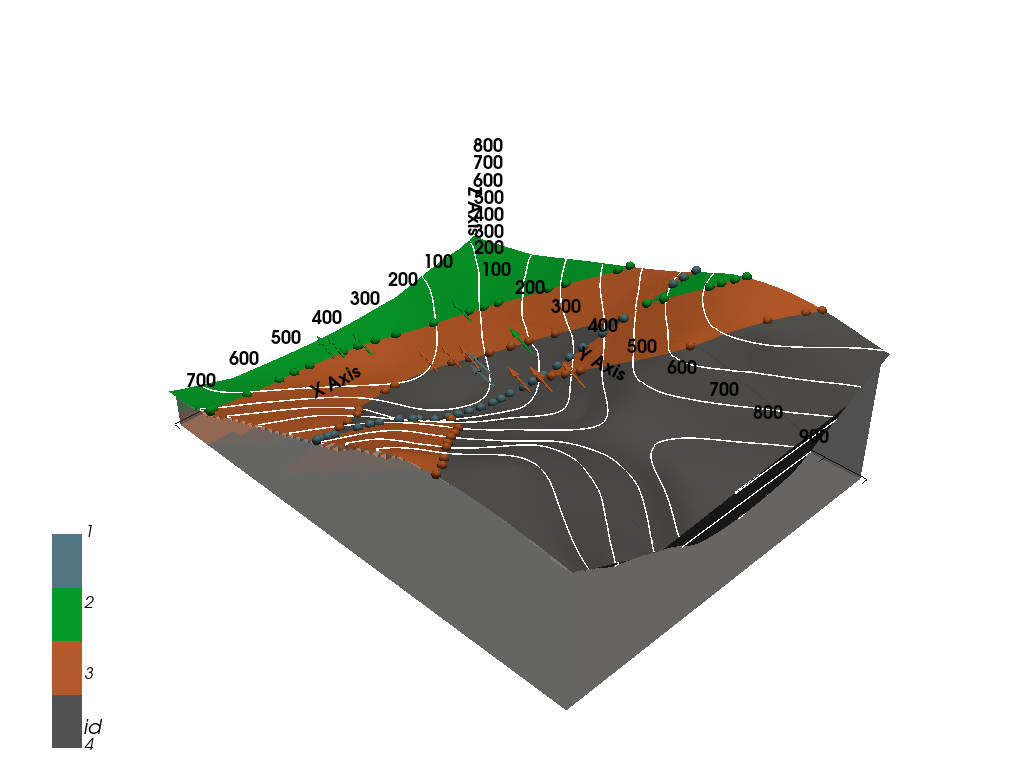

In [61]:
gpv = gp.plot_3d(geo_model, image=False, show_topography=True,
                 plotter_type='basic', notebook=True, ve = 0.4)

# Postprocessing - Converting Geological Map to Shape Files

## Create GeoDataFrame with Polygons

In [62]:
gdf = gg.post.extract_lithologies(geo_model, geo_data.extent[:4], geo_data.crs)
gdf

formation                                           geometry
0  basement  POLYGON ((414.762 253.545, 415.769 253.534, 41...
1    Layer1  POLYGON ((473.221 65.015, 472.865 65.026, 472....
2    Fault1  POLYGON ((1.512 0.504, 2.520 0.504, 3.528 0.50...
3    Fault1  POLYGON ((102.304 557.005, 102.404 557.006, 10...
4    Fault1  POLYGON ((99.281 557.997, 100.289 558.003, 101...

## Plot Polygons

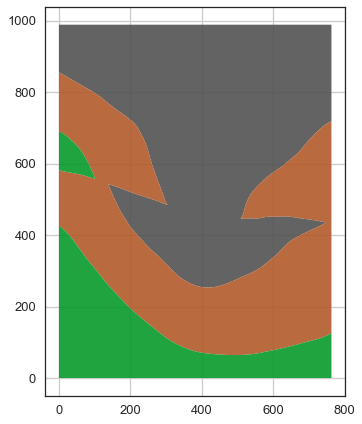

In [63]:
gdf.plot(column='formation', cmap=ListedColormap(cols), alpha=0.9)
plt.grid()

## Save Polygons as Shape Files

These polygons can now be saved as shape files and displayed for example as in QGIS shown below. 

In [64]:
gdf.to_file('../../../gemgis/data/examples/example4/liths.shp')

## Save Polygons as GeoTiff

Rasters like DEMs can be saved as georeferenced tif-files. The same can be done with the geological map obtained from `GemPy` by saving the array of the geological map as tif. 

In [65]:
gg.raster.save_as_tiff('../../../gemgis/data/examples/example4/geolmap.tif',gmap, extent=geo_data.extent, crs='EPSG:4326')